# Explore here

## Load data store


In [94]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

16 columnas/variables diferentes, con 48.895 entradas/filas

In [3]:
print(f"el número de duplicados en la columna id es: {total_data['id'].duplicated().sum()}")
print(f"el número de duplicados en la columna name es: {total_data['name'].duplicated().sum()}")
print(f"el número de duplicados en la columna host_name es: {total_data['host_name'].duplicated().sum()}")

el número de duplicados en la columna id es: 0
el número de duplicados en la columna name es: 989
el número de duplicados en la columna host_name es: 37442


Estas variables, aún algunas conteniendo muchos datos duplicados, es plausible que haya un dueño con varias casas o varias casas con mismas descripciones

In [7]:
total_data.isnull().sum().sort_values() 

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
name                                 16
host_name                            21
last_review                       10052
reviews_per_month                 10052
dtype: int64

La mayoría de variables contienen todos los datos exceptuando "last_review" y "reviews_per_month" que tienen 10.052 datos nulos o inexistentes.

In [15]:
filt1_data = total_data[["host_id", "neighbourhood_group", "neighbourhood", "latitude", "longitude", "room_type", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "availability_365"]]
filt1_data.head()




,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [114]:
filt1_data = filt1_data[filt1_data['price'] != 0]
filt1_data

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


- Se eliminan variables con muchos datos nulos o aquellas que no vayan a aportar valor para el modelo predictivo, que en este caso, será un modelo predictivo de la variable "price". Se crea un Dataframe con un 1er filtro llamado "filt1_data" con las variables más interesantes.
- Se eliminan todos los inmuebles cuyo precio es = 0

## Análisis Univariante 

clasificación de las variables por categoría:

- Categóricas: host_id, neighbourhood_group, neighbourhood, room_type, availability_365

- Numéricas: latitude, longitude, price, minimum_nights, number_of_reviews, calculated_host_listings_count

Análisis de variables categóricas

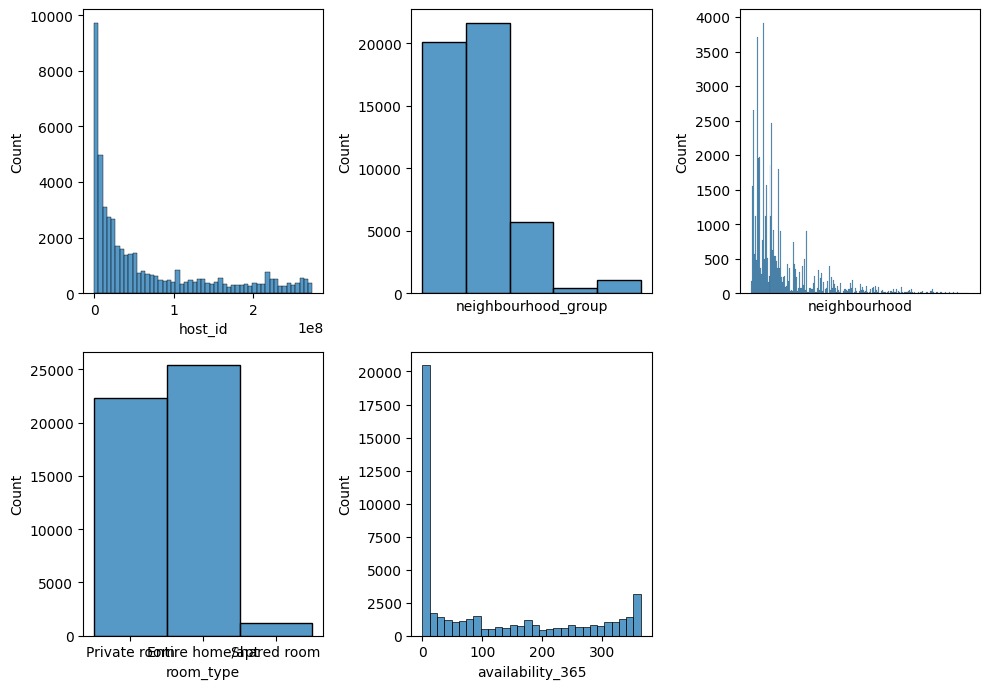

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

#histogramas

sns.histplot(ax = axis [0,0], data = filt1_data, x = "host_id")
sns.histplot(ax = axis [0,1], data = filt1_data, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis [0,2], data = filt1_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis [1,0], data = filt1_data, x = "room_type")
sns.histplot(ax = axis [1,1], data = filt1_data, x = "availability_365")
fig.delaxes(axis[1,2])

plt.tight_layout()
plt.show()

In [5]:
#averiguamos el top de host_id
x = filt1_data["host_id"].value_counts()
x.sort_values()



host_id
2233165        1
24884472       1
9504403        1
32824042       1
52551507       1
            ... 
16098958      96
137358866    103
30283594     121
107434423    232
219517861    327
Name: count, Length: 37457, dtype: int64

In [6]:
#averiguamos el total de inmuebles en cada neighbourhood_group
count = filt1_data['neighbourhood_group'].value_counts()
count

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

Observaciones:

- Host_id: aún habiendo 37.457, hay algunos hospedadores que cuentan un número mayor de inmuebles que el resto, siendo (host_id = 219517861, (una inmobiliaria llamada Sonder que admisnistra alquileres a corto plazo)) el que más tiene con un total de 327 inmuebles.

- Neighbourhood_group = la mayoria de los inmuebles se encuentran en Manhattan (21.661), seguido de Brooklyn (20.104), Queens (5.666), Bronx (1.091) y por último Staten Island (373).

- Neighbourhood: Obviamente hay pisos repartidos por todo el conjunto de barrios de la ciudad.

- Room_type: la mayor disponibilidad de inmuebles son del tipo "Entire Homes/Apt", seguidos de "Private Rooms" y por último "Shared rooms".

- Availability_365: en la mayoría de pisos se observa que la disponibilidad es de 0 días, lo que podría dar a entender que hay un problema/error en la recolección de datos. Sin tener en cuenta este dato, la mayoría está disponible los 365 días del año.

Análisis de variables numéricas

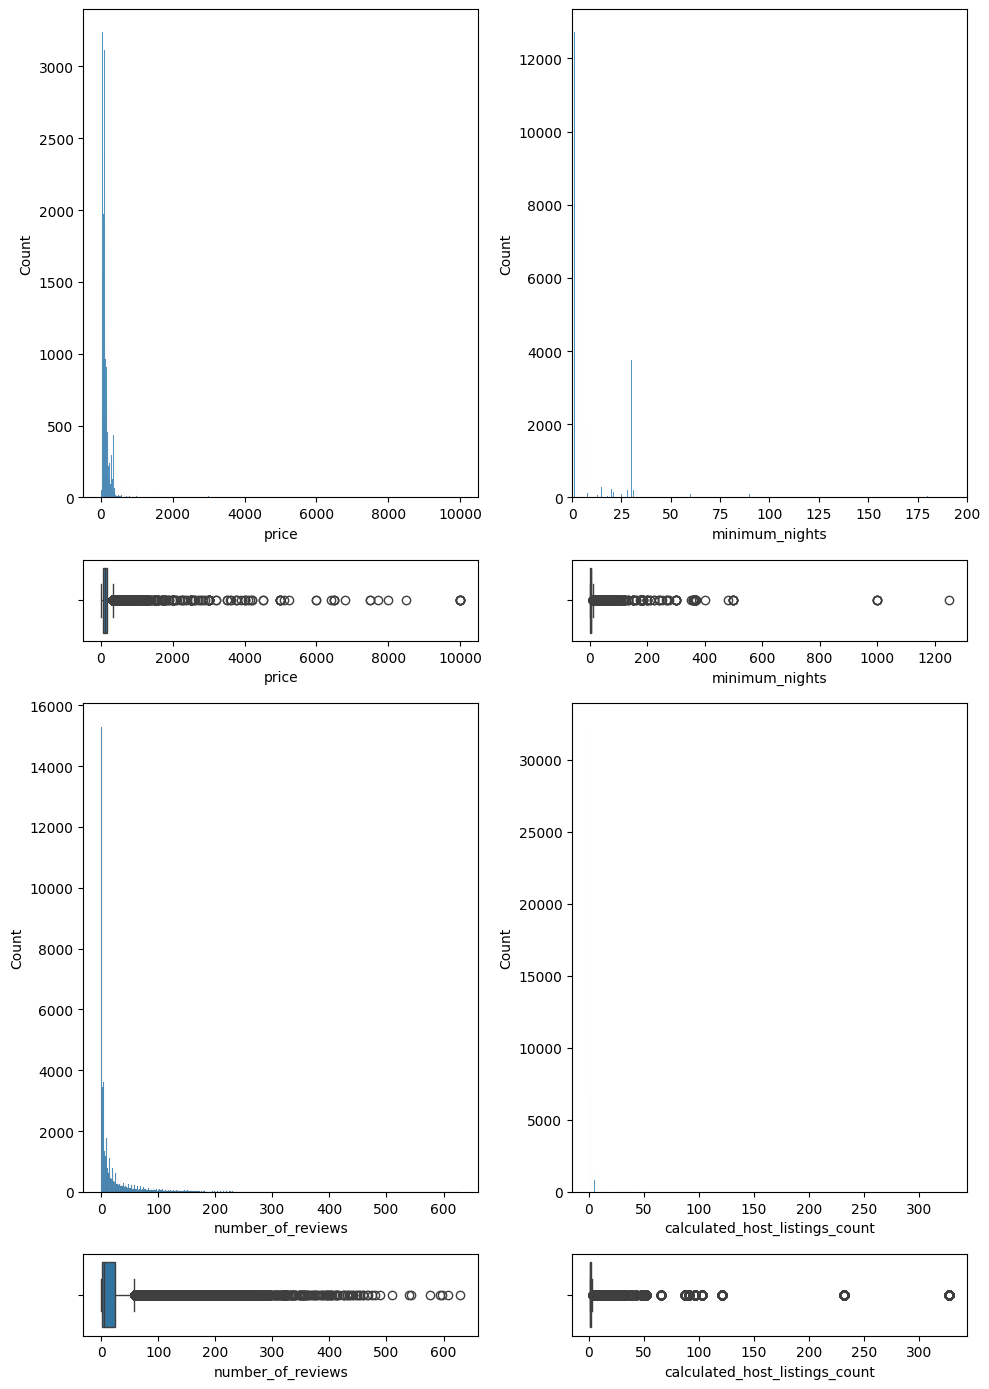

In [17]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw= {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = filt1_data, x = "price")
sns.boxplot(ax = axis[1, 0], data = filt1_data, x = "price")

sns.histplot(ax = axis[0, 1], data = filt1_data, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = filt1_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = filt1_data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = filt1_data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = filt1_data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = filt1_data, x = "calculated_host_listings_count")


plt.tight_layout()
plt.show()


- La mayoría de los datos obtenidos en la variable "price" se hayan por debajo de los 175 USD (Q3), aunque hay una cantidad considerable de outliers llegando a haber datos máximos de 10.000 USD

- La mayoría de inmuebles ofrecen entre 1 y 5 días como mínimo para hospedarse. También hay datos registrados en los que el mínimo requerido para hospedarse es de más de 500 días, llegando a un máximo de 1.250 días

- La mayoría de "number_of_reviews" se encuentrann por debajo de las 100/inmueble (45.900), encontrándose solo 3.044 inmubebles por encima de las 100 reviews.

- La mayoría de datos dentro de "calculated_host_listings_count  " se encuentran por debajo de 10, lo que podría sugerir que la gran mayoría de inmuebles se alquilan a corto plazo, más aún teniendo en cuenta que es una base de datis de Airbnb.

## Análisis Multivariante

Análisis numérico-numérico

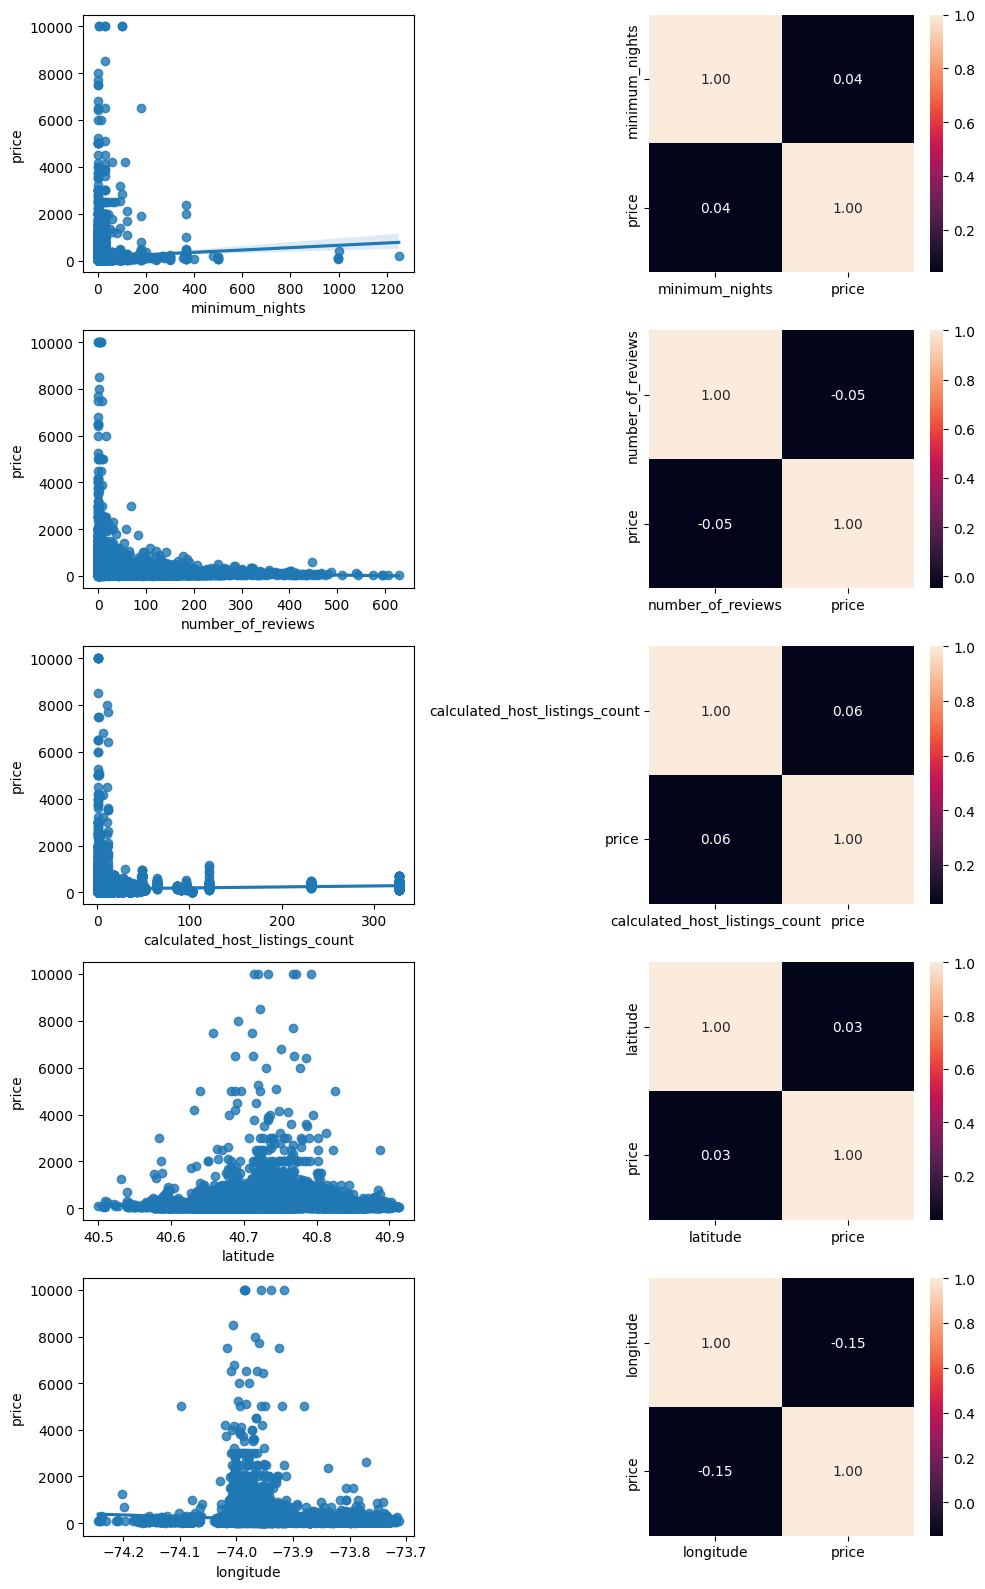

In [21]:
fig, axis = plt.subplots(5, 2, figsize = (10, 16))

sns.regplot(ax=axis[0,0], data= filt1_data, x= "minimum_nights", y= "price")
sns.heatmap(filt1_data[["minimum_nights", "price"]].corr(), annot= True, fmt= ".2f", ax= axis[0,1])

sns.regplot(ax=axis[1,0], data= filt1_data, x= "number_of_reviews", y= "price")
sns.heatmap(filt1_data[["number_of_reviews", "price"]].corr(), annot= True, fmt= ".2f", ax= axis[1,1])

sns.regplot(ax=axis[2,0], data= filt1_data, x= "calculated_host_listings_count", y= "price")
sns.heatmap(filt1_data[["calculated_host_listings_count", "price"]].corr(), annot= True, fmt= ".2f", ax= axis[2,1])

sns.regplot(ax=axis[3,0], data= filt1_data, x= "latitude", y= "price")
sns.heatmap(filt1_data[["latitude", "price"]].corr(), annot= True, fmt= ".2f", ax= axis[3,1])

sns.regplot(ax=axis[4,0], data= filt1_data, x= "longitude", y= "price")
sns.heatmap(filt1_data[["longitude", "price"]].corr(), annot= True, fmt= ".2f", ax= axis[4,1])

#fig.delaxes(axis[4, 1])
#fig.delaxes(axis[5, 1])

plt.tight_layout()
plt.show()

No se haya una correlación signficativa entre la variable predictora "price" y las variables "minimun_nights", "number_of_reviews" y "calculated_host_listings_count", "longitude" y "latitude"

Análisis categórico-categórico

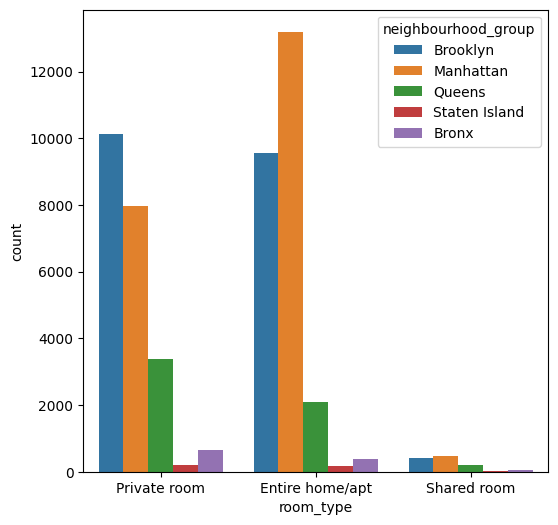

In [9]:
fig, axis = plt.subplots(figsize = (6, 6))

sns.countplot(data = filt1_data, x = "room_type", hue = "neighbourhood_group")

plt.show()

- Manhattan ofrece el mayor número de inmuebles de todos los "neighbourhood_group", ofreciendo en su gran mayoría private room y entire home/apt.

- A Manhattan le sigue de cerca Brooklyn, siendo este barrio el que más private room ofrece.

In [124]:
#Factorización de "neighbourhood_group" y "room_type" para poder establecer comparaciones con la variable predictora "price"
filt1_data["neighbourhood_group_n"] = pd.factorize(filt1_data["neighbourhood_group"])[0]
filt1_data["room_type_n"] = pd.factorize(filt1_data["room_type"])[0]
filt1_data["neighbourhood_n"] = pd.factorize(filt1_data["neighbourhood"])[0]

filt1_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,0,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,1,0,2
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,0,1,3
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,1,4


In [24]:
# pip install openpyxl <- Ejecutar antes del to_excel

filt1_data.drop_duplicates(["neighbourhood_group", "neighbourhood_group_n"])[["neighbourhood_group", "neighbourhood_group_n"]].to_excel("/workspaces/EDA-exercises/neighbourhood_group_to_neighbourhood_group_n.xlsx", index = False)
filt1_data.drop_duplicates(["room_type", "room_type_n"])[["room_type", "room_type_n"]].to_excel("/workspaces/EDA-exercises/room_type_to_room_type_n.xlsx", index = False)
filt1_data.drop_duplicates(["neighbourhood", "neighbourhood_n"])[["neighbourhood", "neighbourhood_n"]].to_excel("/workspaces/EDA-exercises/neighbourhood_to_neighbourhood_n.xlsx", index = False)

filt1_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,0,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,1,0,2
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,0,1,3
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,1,4


Análisis numérico-categórico completo

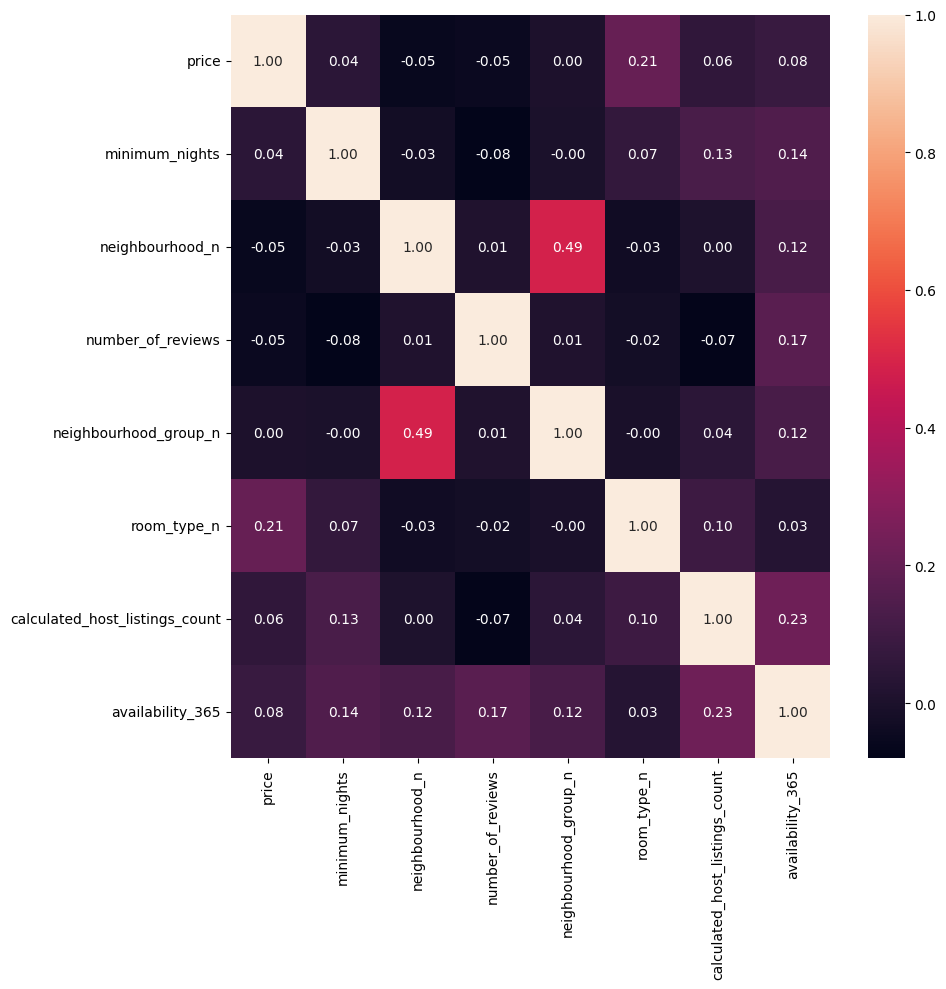

In [25]:
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(filt1_data[["price", "minimum_nights", "neighbourhood_n", "number_of_reviews", "neighbourhood_group_n", "room_type_n", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

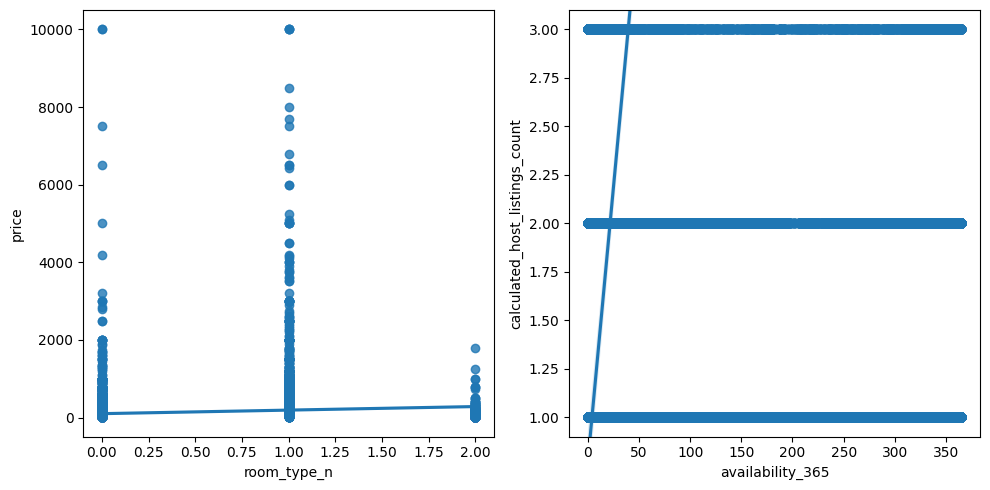

In [29]:
fig, axis = plt.subplots(2, 2, figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = filt1_data, x = "room_type_n", y = "price")
sns.regplot(ax = axis[1], data = filt1_data, x = "availability_365", y = "calculated_host_listings_count").set(ylim = (0.9, 3.1))

plt.tight_layout()

plt.show()

## Feature Engineering

- Análisis de outliers

In [125]:
filt1_data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,7.144628,112.779498,0.786986,0.567118,29.889534
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,32.956185,131.627271,0.844288,0.541183,34.673859
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,1.000000,19.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000,37.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,4.000000,2.000000,220.000000


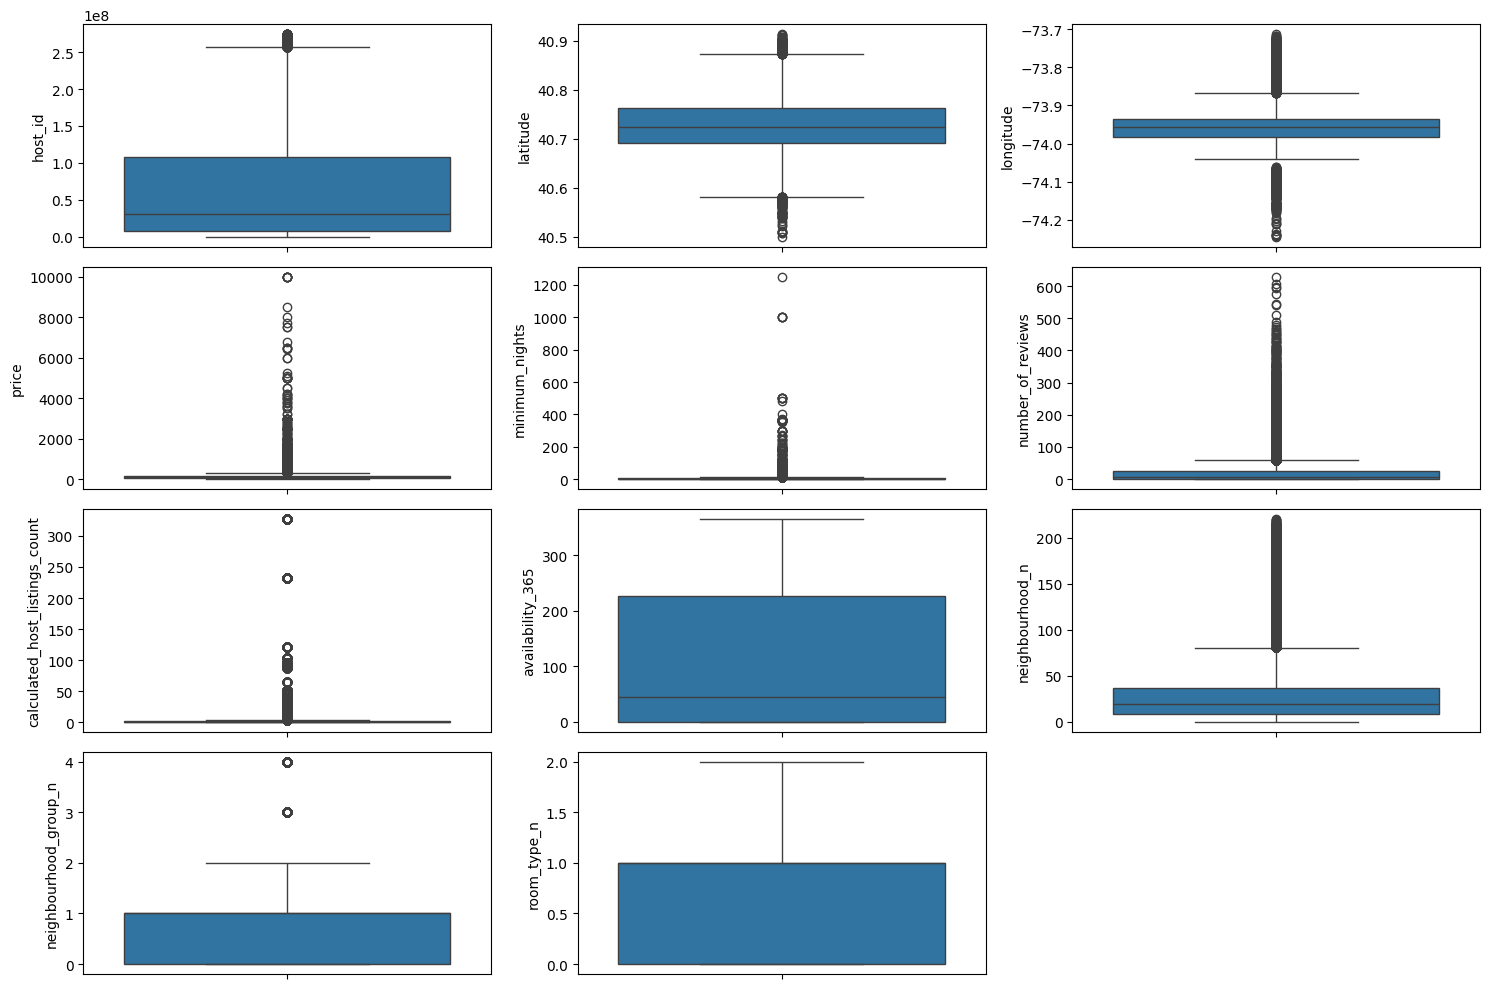

In [28]:
fig, axis = plt.subplots(4, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = filt1_data, y = "host_id")
sns.boxplot(ax = axis[0, 1], data = filt1_data, y = "latitude")
sns.boxplot(ax = axis[0, 2], data = filt1_data, y = "longitude")
sns.boxplot(ax = axis[1, 0], data = filt1_data, y = "price")
sns.boxplot(ax = axis[1, 1], data = filt1_data, y = "minimum_nights")
sns.boxplot(ax = axis[1, 2], data = filt1_data, y = "number_of_reviews")
sns.boxplot(ax = axis[2, 0], data = filt1_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[2, 1], data = filt1_data, y = "availability_365")
sns.boxplot(ax = axis[2, 2], data = filt1_data, y = "neighbourhood_n")
sns.boxplot(ax = axis[3, 0], data = filt1_data, y = "neighbourhood_group_n")
sns.boxplot(ax = axis[3, 1], data = filt1_data, y = "room_type_n")

fig.delaxes(axis[3, 2])

plt.tight_layout()

plt.show()

Se observan outliers principalmente en:  minimum_nights, number_of_reviews, calculated_host_listings_count

- Análisis de 'Missings Values'

In [126]:
data_outliers.isnull().sum().sort_values(ascending = False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

No se observan missings values

- Imputación de valores en outliers

In [127]:
#base de datos con outliers
data_outliers = filt1_data.copy()
data_outliers.head()


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,0,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,1,0,2
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,0,1,3
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,1,4


In [128]:
data_outliers.to_excel("/workspaces/EDA-exercises/data_with_outliers_no_scaled.xlsx", index = False)


In [129]:
#base de datos sobre la que se limpiarán e imputarán los outliers
data_no_outliers = data_outliers.copy()
data_no_outliers.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,0,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,1,0,2
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,0,1,3
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,1,4


In [136]:
describe_minimum_nights = filt1_data['minimum_nights'].describe()
describe_minimum_nights

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [131]:
minimum_nights_iqr = describe_minimum_nights["75%"] - describe_minimum_nights["25%"]
upper_limit = describe_minimum_nights["75%"] + 1.5 * minimum_nights_iqr
lower_limit = describe_minimum_nights["25%"] - 1.5 * minimum_nights_iqr
lower_limit = 0
print(f"lower limit for finding outliers: {round(lower_limit, 2)} \nupper limit for finding outliers: {round(upper_limit, 2)}\nIQR: {round(minimum_nights_iqr, 2)}")
minimum_nights_outliers = filt1_data[filt1_data["minimum_nights"] <= upper_limit]
minimum_nights_outliers

lower limit for finding outliers: 0 
upper limit for finding outliers: 11.0
IQR: 4.0


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,0,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,1,0,2
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,0,1,3
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9,0,0,6
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36,0,0,21
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,1,1,2
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2,1,2,7


In [137]:
moda_nights = filt1_data['minimum_nights'].mode()
moda_nights

0    1
Name: minimum_nights, dtype: int64

In [138]:
number_of_reviews_stats = filt1_data['number_of_reviews'].describe()
number_of_reviews_stats


count    48884.000000
mean        23.271991
std         44.551331
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [139]:
number_of_reviews_iqr = number_of_reviews_stats["75%"] - number_of_reviews_stats["25%"]
upper_lim = number_of_reviews_stats["75%"] + 1.5 * number_of_reviews_iqr
lower_lim = number_of_reviews_stats["25%"] - 1.5 * minimum_nights_iqr
lower_lim = 0
print(f"lower limit for finding outliers: {round(lower_lim, 2)} \nupper limit for finding outliers: {round(upper_lim, 2)}\nIQR: {round(number_of_reviews_iqr, 2)}")
number_of_reviews_outliers = filt1_data[data_no_outliers["number_of_reviews"] <= upper_lim]
number_of_reviews_outliers

lower limit for finding outliers: 0 
upper limit for finding outliers: 58.5
IQR: 23.0


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,0,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,1,0,2
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,1,4
6,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,1,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9,0,0,6
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36,0,0,21
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,1,1,2
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2,1,2,7


In [140]:
mode_reviews = filt1_data['number_of_reviews'].mode()
mode_reviews

0    0
Name: number_of_reviews, dtype: int64

In [141]:
calculated_host_listings_count_stats = filt1_data["calculated_host_listings_count"].describe()
calculated_host_listings_count_stats

count    48884.000000
mean         7.144628
std         32.956185
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [142]:
calculated_host_listings_count_iqr = calculated_host_listings_count_stats["75%"] - calculated_host_listings_count_stats["25%"]
upper_l = calculated_host_listings_count_stats["75%"] + 1.5 * calculated_host_listings_count_iqr
lower_l = calculated_host_listings_count_stats["25%"] - 1.5 * calculated_host_listings_count_iqr
lower_l = 0
print(f"lower limit for finding outliers: {round(lower_l, 2)} \nupper limit for finding outliers: {round(upper_l, 2)}\nIQR: {round(calculated_host_listings_count_iqr, 2)}")
calculated_host_listings_count_outliers = filt1_data[data_no_outliers["calculated_host_listings_count"] <= upper_l]
calculated_host_listings_count_outliers

lower limit for finding outliers: 0 
upper limit for finding outliers: 3.5
IQR: 1.0


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,1,0,2
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,0,1,3
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,1,4
5,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,107716952,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,2,163,2,0,46
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9,0,0,6
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36,0,0,21
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,1,1,2


In [143]:
mode_calculated_host_listings_count = filt1_data['calculated_host_listings_count'].mode()
mode_calculated_host_listings_count

0    1
Name: calculated_host_listings_count, dtype: int64

In [144]:
data_no_outliers['minimum_nights'] = data_no_outliers['minimum_nights'].apply(lambda x: 1 if x >= 11 else x)

In [145]:
data_no_outliers['number_of_reviews'] = data_no_outliers['number_of_reviews'].apply(lambda x: 0 if x >= 59 else x)

In [146]:
data_no_outliers['calculated_host_listings_count'] = data_no_outliers['calculated_host_listings_count'].apply(lambda x: 1 if x >= 4 else x)

In [148]:
#base de datos sin outliers
data_no_outliers


,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,1,365,0,0,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,1,0,2
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,0,1,194,0,1,3
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9,0,0,6
48891,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36,0,0,21
48892,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,1,1,2
48893,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,1,2,1,2,7


In [149]:
data_no_outliers.to_excel("/workspaces/EDA-exercises/data_with_no_outliers_no_scaled.xlsx", index = False)


In [150]:
filt1_data.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_n', 'room_type_n',
       'neighbourhood_n'],
      dtype='object')

- Feature Scaling

In [162]:
from sklearn.model_selection import train_test_split

predictoras = ['minimum_nights','number_of_reviews', 'calculated_host_listings_count',
               'availability_365', 'neighbourhood_group_n', 'room_type_n','neighbourhood_n']
target = 'price'

X = filt1_data[predictoras]
y = filt1_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
22111,6,47,1,40,1,0,64
38200,2,5,1,78,1,0,7
16707,2,6,1,0,1,1,28
5157,2,179,1,179,1,1,19
22136,5,47,1,5,2,0,56


- Normalización

In [158]:
from sklearn.preprocessing import StandardScaler
from pickle import dump


scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = predictoras)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = predictoras)

dump(scaler, open("/workspaces/EDA-exercises/normalizer.sav", "wb"))


X_train_norm.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
22111,-0.055065,0.537860,-0.187991,-0.554057,0.251684,-1.049199,0.984911
38200,-0.249585,-0.409377,-0.187991,-0.265608,0.251684,-1.049199,-0.658798
16707,-0.249585,-0.386823,-0.187991,-0.857688,0.251684,0.795403,-0.053221
5157,-0.249585,3.514889,-0.187991,0.501059,0.251684,0.795403,-0.312754
22136,-0.103695,0.537860,-0.187991,-0.819734,1.439564,-1.049199,0.754215


- Escalado Mínimo-Máximo

In [163]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = predictoras)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = predictoras)

X_train_scal.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n,neighbourhood_n
22111,0.004003,0.077430,0.0,0.109589,0.25,0.0,0.290909
38200,0.000801,0.008237,0.0,0.213699,0.25,0.0,0.031818
16707,0.000801,0.009885,0.0,0.000000,0.25,0.5,0.127273
5157,0.000801,0.294893,0.0,0.490411,0.25,0.5,0.086364
22136,0.003203,0.077430,0.0,0.013699,0.50,0.0,0.254545
